In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prettify Graphs
np.set_printoptions(precision=3, suppress=True)
sns.set_theme(style='darkgrid', palette='pastel', font_scale=1.25)
plt.rc('xtick', labelsize=10)

# What is gravity? Your explanation should be ____ 150 words.

In [9]:
# histograms

def plot_histogram(df, name, ax, min_length, max_length):
    bins = range(80, 255, 5)
    n, _, patches = ax.hist(df.length, bins=bins)
    ax.set_xticks(bins)
    ax.set_xticklabels(bins, rotation=45, ha='center')
    # ax.set_xlabel('Word count')
    ax.set_ylim(0, 20)
    ax.set_ylabel('Number of responses')
    # view correct bins
    correct_bins = np.where((np.array(bins) >= min_length) & (np.array(bins) < max_length))[0]
    correct_percentage = sum(n[i] for i in correct_bins) / len(df) * 100

    ax.set_title(f'{name}: {correct_percentage:.2f}%')
    for i in correct_bins:
        patches[i].set_facecolor('orange')

def process_files(data_dir, min_length, max_length):

    # read dataframes
    dfs = {}
    for data_file in sorted(os.listdir(data_dir)):
        df = pd.read_csv(f'./{data_dir}/{data_file}', index_col=0)
        dfs[data_file.split('_')[0]] = df

    # plot dataframes
    fig, axs = plt.subplots(nrows=len(dfs), ncols=1, figsize=(12,4*len(dfs)))
    plt.rcParams['xtick.major.size'] = 5
    plt.rcParams['xtick.major.width'] = .5
    plt.rcParams['xtick.bottom'] = True
    for name, ax in zip(dfs, axs):
        plot_histogram(dfs[name], name, ax, min_length, max_length)

    plt.tight_layout()
    plt.savefig(f'./Figures/{data_dir}.png', dpi=150)
    plt.show()
    return dfs

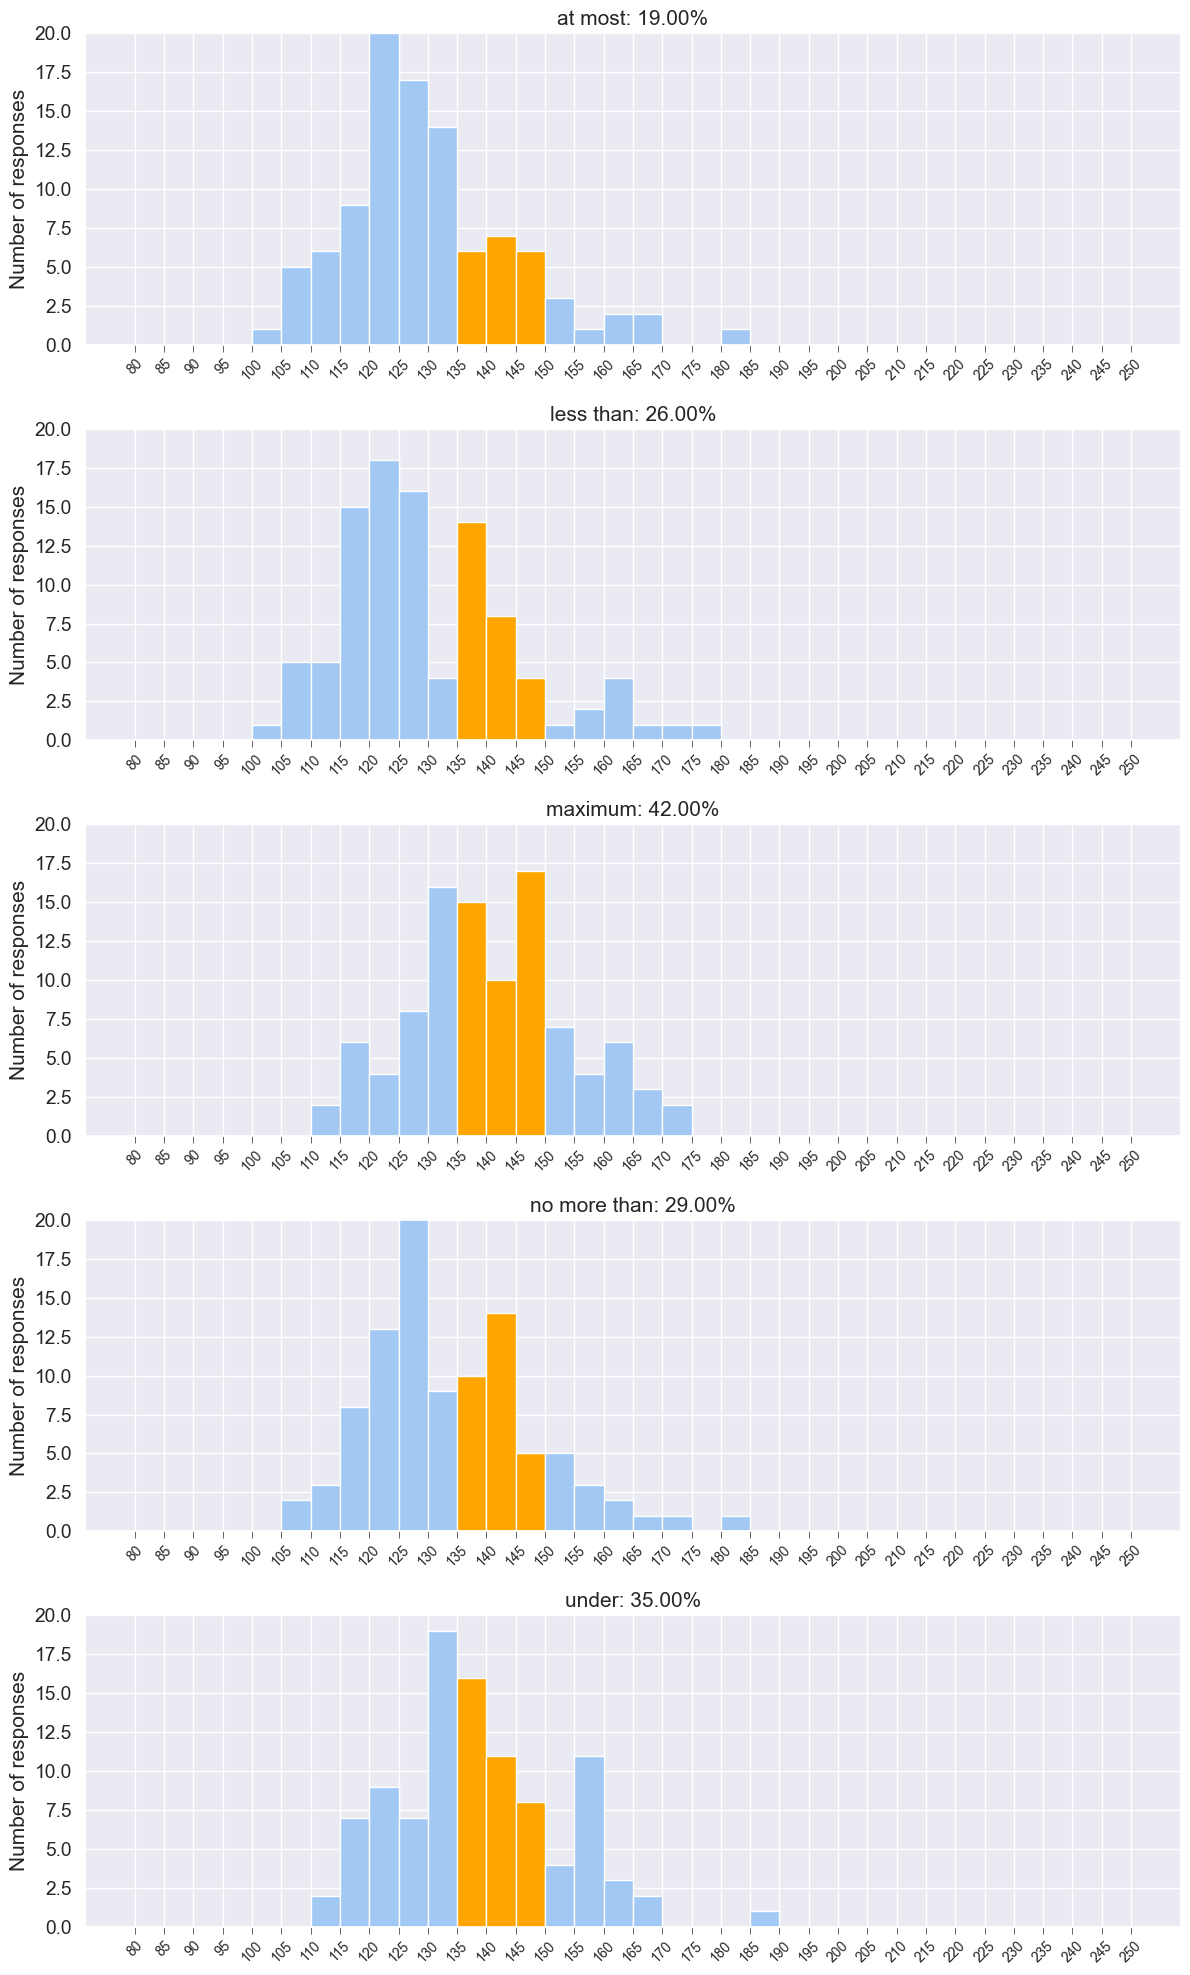

In [11]:
# max_limit

dfs = process_files('max_limit', min_length=135, max_length=150)

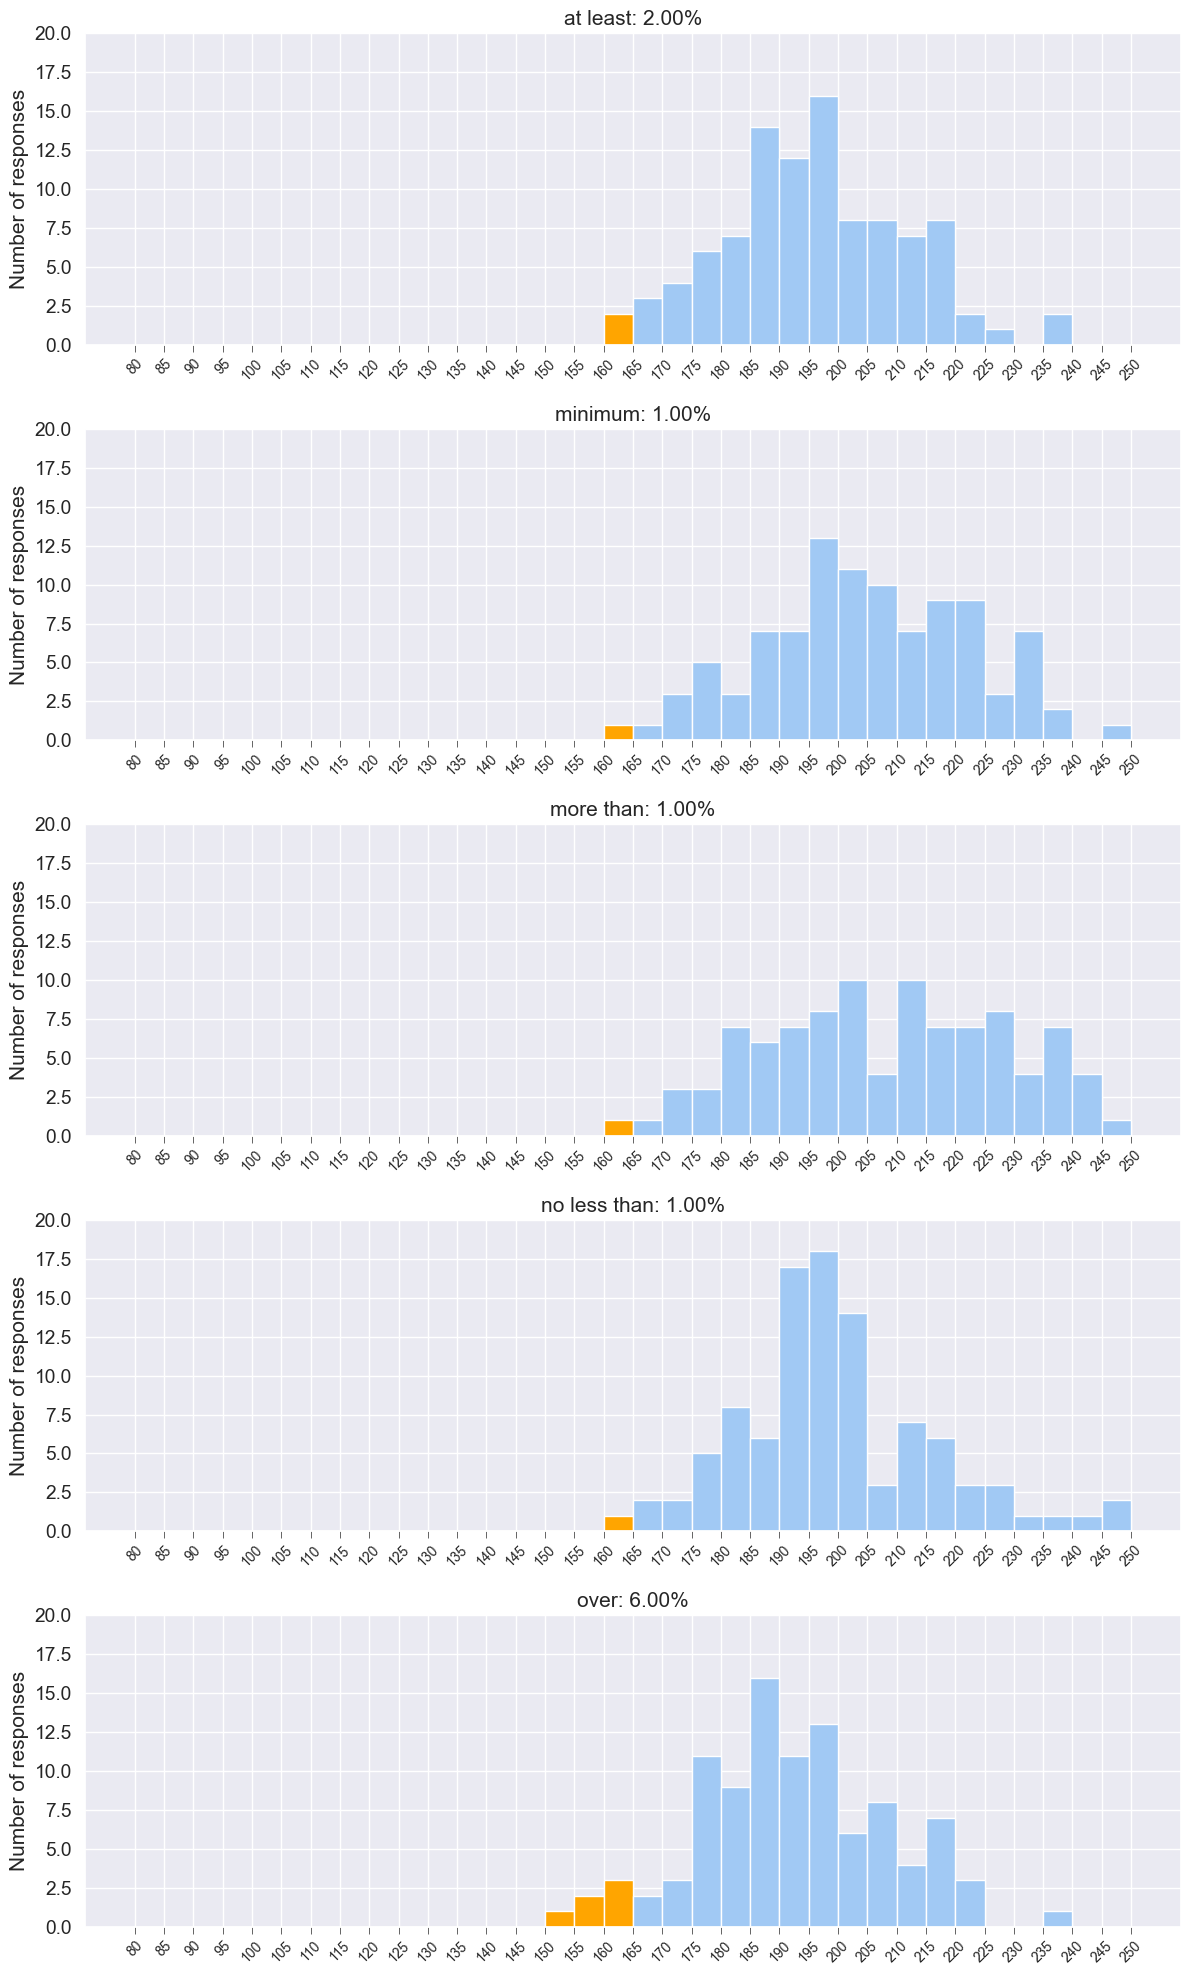

In [12]:
# min_limit

dfs = process_files('min_limit', min_length=150, max_length=165)

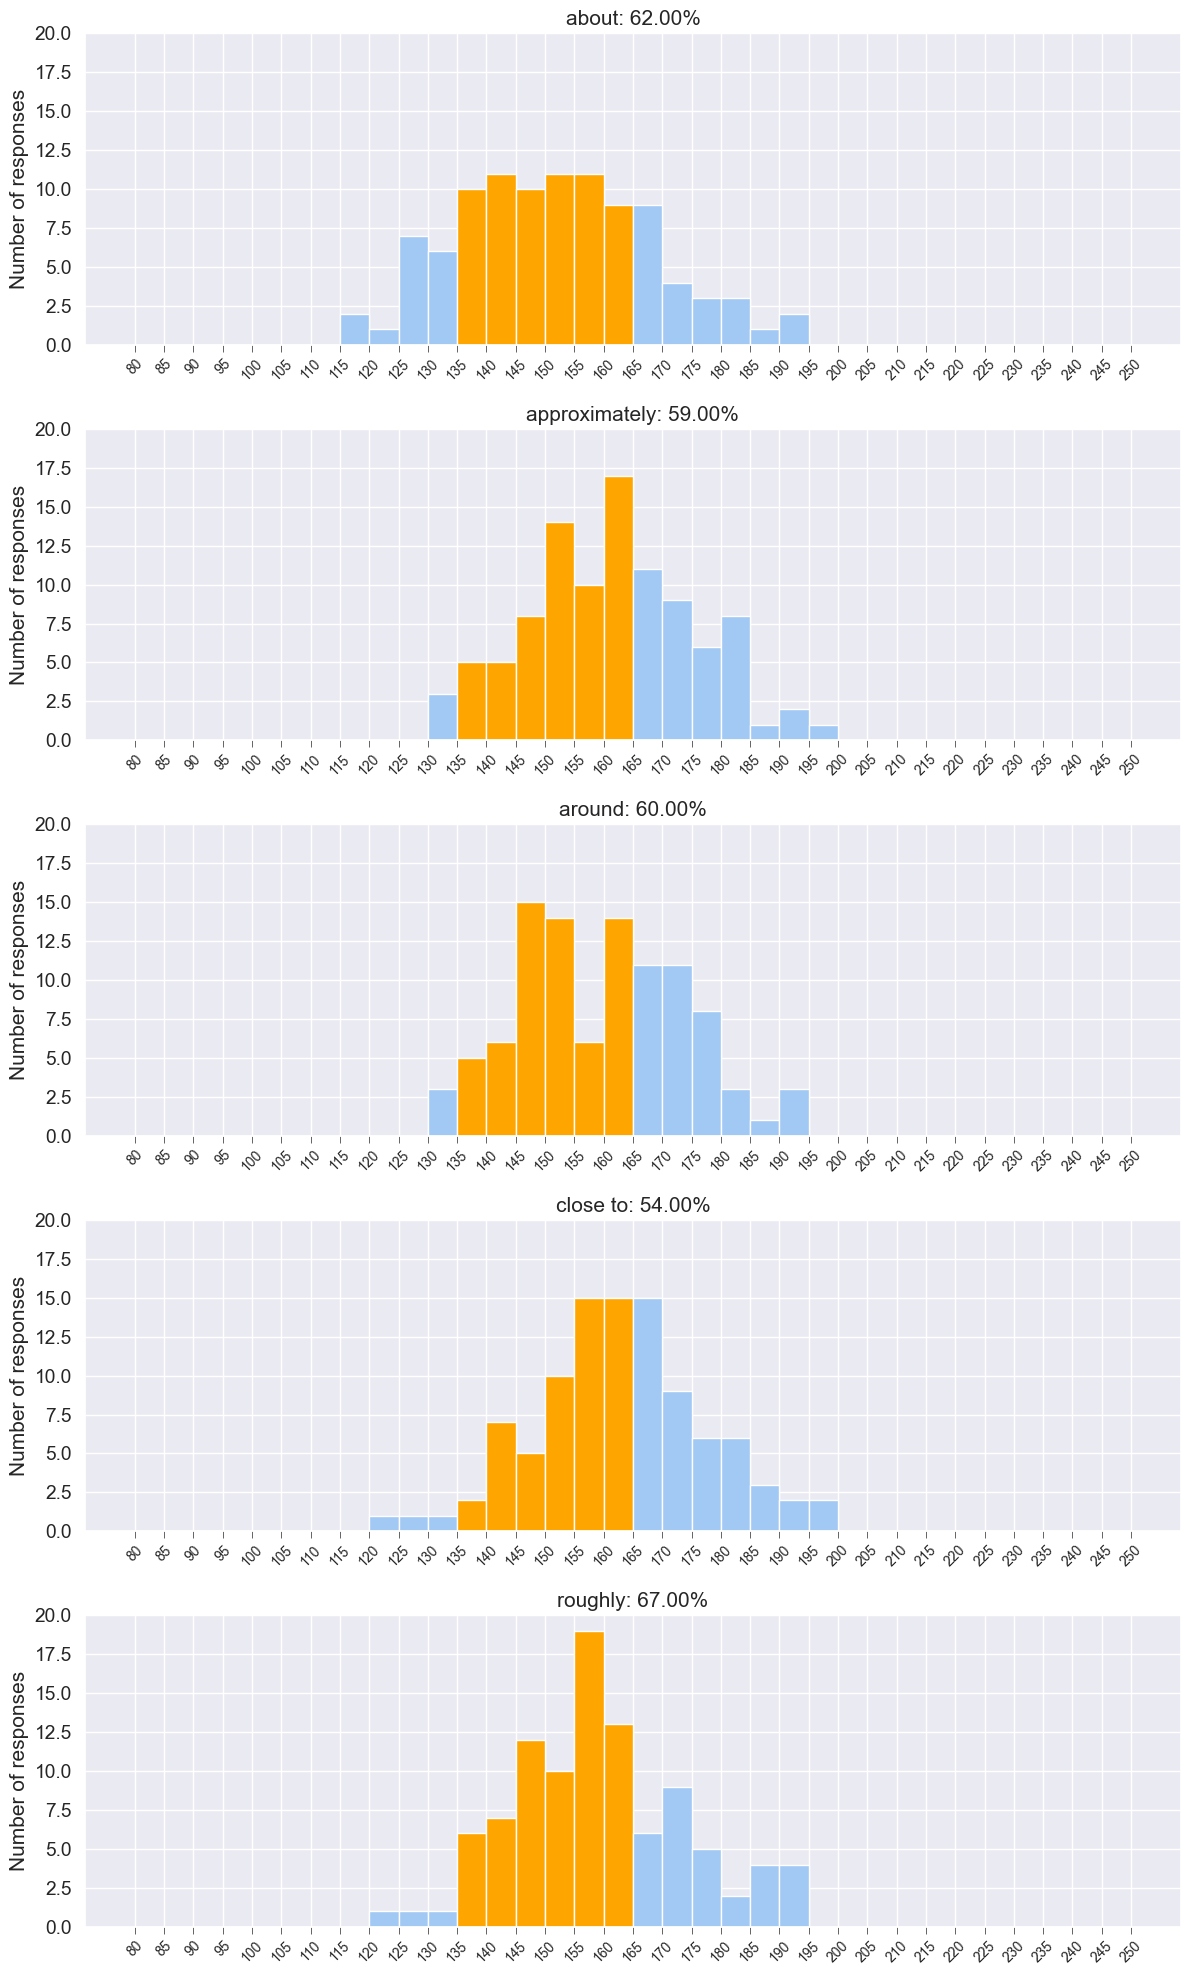

In [13]:
# approx

dfs = process_files('approx', min_length=135, max_length=165)

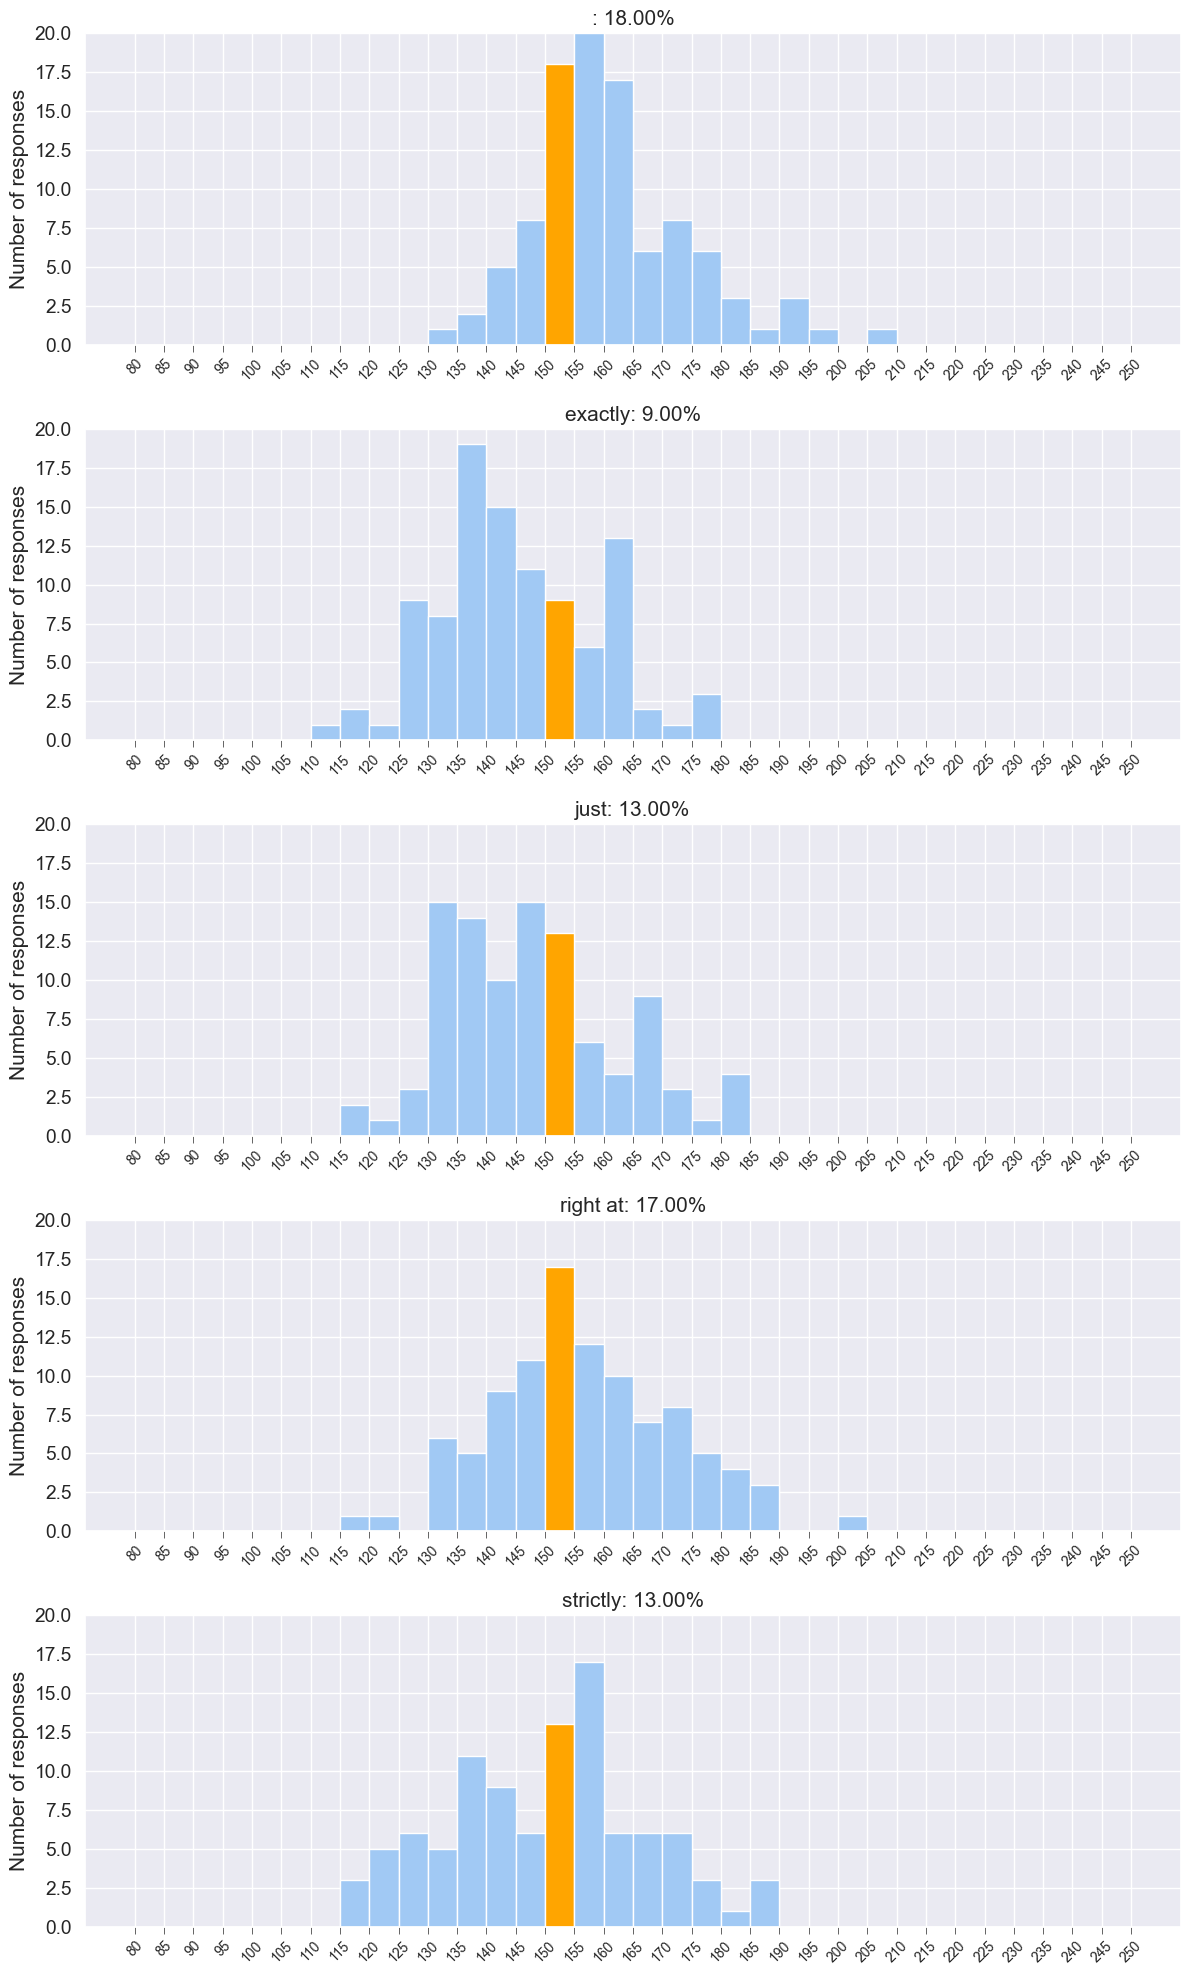

In [14]:
# exact

dfs = process_files('exact', min_length=150, max_length=155)